In [1]:
import os

import matplotlib.animation as animation
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
import pandas as pd
from tifffile import imread
import ffmpeg
from rich.progress import track

pd.options.mode.chained_assignment = None  # default='warn'

### Parameters and path

In [35]:
folder_save = "/Volumes/lsa-nwalter/Guoming_Gao_turbo/Walterlab_server/PROCESSED_DATA/RNA-in-HOPS_condensates/paper_figure_plots/Fig1_example_imgs"

os.chdir(folder_save)
zstack = imread("Merged_GAPDH-cropped.tif")
df_RNA = pd.read_csv("Merged_GAPDH-RNA_reformatted.csv")
df_condensate = pd.read_csv("Merged_GAPDH-condensate_reformatted.csv")
cell_outline_coordinates = pd.read_csv("Merged_GAPDH-cell.txt", sep="	", header=None)

color_blue = "#6495ED"
cmap_name = "dark2blue"
cmap_blue = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    ["black", color_blue],
)

color_red = "#C0382F"
cmap_name = "dark2red"
cmap_red = clr.LinearSegmentedColormap.from_list(
    cmap_name,
    ["black", color_red],
)

### img + detected spots

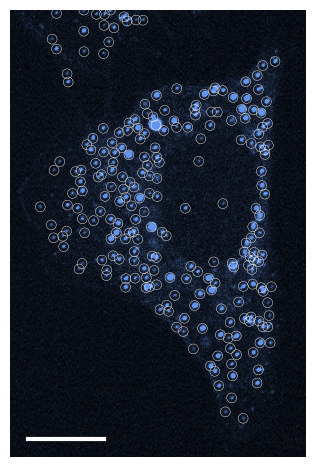

In [48]:
frame = 1
img_blue = zstack[frame, 1, :, :]
img_red = zstack[frame, 0, :, :]
fig, ax = plt.subplots(1, 1)
plt.imshow(
    img_blue,
    cmap=cmap_blue,
    vmin=450,
    vmax=900,
)
current_x = df_condensate[df_condensate["t"] == frame]["x"].to_numpy()
current_y = df_condensate[df_condensate["t"] == frame]["y"].to_numpy()
plt.scatter(
    current_x,
    current_y,
    marker="o",
    facecolors="none",
    edgecolors="white",
    s=50,
    lw=0.3,
)
scalebar_length_um = 10
scalebar_length_pxl = scalebar_length_um / 0.117
x_pos = 20
y_pos = 485
plt.plot(
    [x_pos, x_pos + scalebar_length_pxl],
    [y_pos, y_pos],
    lw=3,
    ls="-",
    c="white",
)
plt.xlim(0, img_blue.shape[0])
plt.ylim(0, img_blue.shape[1])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")
plt.savefig(
    "GAPDH-condensate-" + str(frame) + ".png",
    format="png",
    bbox_inches="tight",
    dpi=600,
)

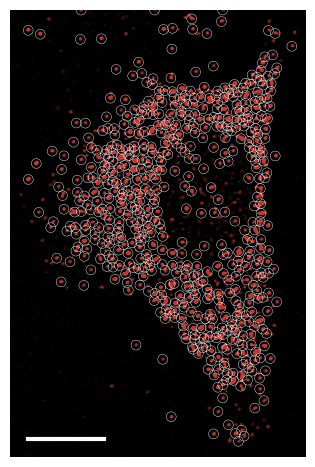

In [47]:
frame = 1
img_blue = zstack[frame, 1, :, :]
img_red = zstack[frame, 0, :, :]
fig, ax = plt.subplots(1, 1)
plt.imshow(
    img_red,
    cmap=cmap_red,
    vmin=30,
    vmax=700,
)
current_x = df_RNA[df_RNA["t"] == frame]["x"].to_numpy()
current_y = df_RNA[df_RNA["t"] == frame]["y"].to_numpy()
plt.scatter(
    current_x,
    current_y,
    marker="o",
    facecolors="none",
    edgecolors="white",
    s=50,
    lw=0.3,
)
scalebar_length_um = 10
scalebar_length_pxl = scalebar_length_um / 0.117
x_pos = 20
y_pos = 485
plt.plot(
    [x_pos, x_pos + scalebar_length_pxl],
    [y_pos, y_pos],
    lw=3,
    ls="-",
    c="white",
)
plt.xlim(0, img_blue.shape[0])
plt.ylim(0, img_blue.shape[1])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")
plt.savefig(
    "GAPDH-RNA-" + str(frame) + ".png",
    format="png",
    bbox_inches="tight",
    dpi=600,
)

### reconstructed spots with cell 

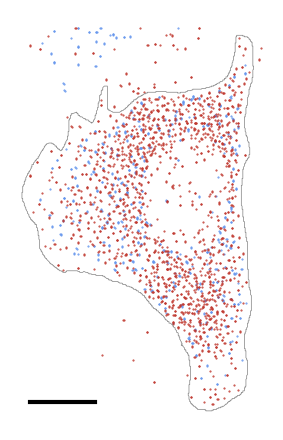

In [46]:
frame = 1
img_blue = zstack[frame, 1, :, :]
img_red = zstack[frame, 0, :, :]
fig, ax = plt.subplots(1, 1)
plt.scatter(
    df_condensate["x"].to_numpy(),
    df_condensate["y"].to_numpy(),
    marker=".",
    c=color_blue,
    s=1,
)
plt.scatter(
    df_RNA["x"].to_numpy(),
    df_RNA["y"].to_numpy(),
    marker=".",
    c=color_red,
    s=1,
)
# cell boundary
x = cell_outline_coordinates.iloc[:, 0].to_numpy()
y = cell_outline_coordinates.iloc[:, 1].to_numpy()
plt.plot(x, y, c="gray", lw=0.5)
# still the last closing line will be missing, get it below
xlast = [x[-1], x[0]]
ylast = [y[-1], y[0]]
plt.plot(xlast, ylast, c="gray", lw=0.5)
# scale bar
scalebar_length_um = 10
scalebar_length_pxl = scalebar_length_um / 0.117
x_pos = 20
y_pos = 485
plt.plot(
    [x_pos, x_pos + scalebar_length_pxl],
    [y_pos, y_pos],
    lw=3,
    ls="-",
    c="black",
)
plt.xlim(0, img_blue.shape[0])
plt.ylim(0, img_blue.shape[1])
plt.gca().invert_yaxis()
plt.tight_layout()
plt.axis("scaled")
plt.axis("off")
plt.savefig(
    "GAPDH-reconstructed.png",
    format="png",
    bbox_inches="tight",
    dpi=600,
)